In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
%config InlineBackend.figure_format = 'retina'

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.21.2 scipy==1.7.0 pandas==1.3.2 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6


# Show data quality （SjS+CTRL）

In [5]:
adata=sc.read_h5ad('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/s02_cx_annotated.h5ad')
adata

AnnData object with n_obs × n_vars = 72853 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'ident', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'sample', 'RNA_snn_res.2', 'seurat_clusters', 'celltype_submarkers', 'celltype_major', 'celltype_minor', 'cli_state'
    var: 'features'
    uns: 'celltype_major_colors', 'celltype_minor_colors', 'neighbors'
    obsm: 'X_PCA', 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    layers: 'scaled'
    obsp: 'distances'

In [37]:
adata.obs.head()
#adata.obs['ident']
#adata.obs['orig.ident']

orig.ident  nCount_RNA  nFeature_RNA  percent.mt   ident  \
TCCAGAAGTAGTACGG-1_1     XNCX_1      436077         10126    4.088727  XNCX_1   
GTTGTCCGTATTTCCT-1_1     XNCX_1      352962          7663    4.699089  XNCX_1   
AAGATAGCAGCGTTGC-1_1     XNCX_1      311412          7930    4.528085  XNCX_1   
GTTTGGAGTCTACAAC-1_1     XNCX_1      296501          7854    2.682622  XNCX_1   
GTAATCGGTCACAATC-1_1     XNCX_1      296398          7766    5.652872  XNCX_1   

                     scDblFinder.sample scDblFinder.class  scDblFinder.score  \
TCCAGAAGTAGTACGG-1_1             XNCX_1           singlet           0.025335   
GTTGTCCGTATTTCCT-1_1             XNCX_1           singlet           0.004421   
AAGATAGCAGCGTTGC-1_1             XNCX_1           singlet           0.001616   
GTTTGGAGTCTACAAC-1_1             XNCX_1           singlet           0.005489   
GTAATCGGTCACAATC-1_1             XNCX_1           singlet           0.002438   

                      scDblFinder.weighted  scDblFinder.cxds_score  sample  \
TCCAGAAGTAGTACGG-1_1              0.314656                1.000000  XNCX_1   
GTTGTCCGTATTTCCT-1_1              0.170975                0.534438  XNCX_1   
AAGATAGCAGCGTTGC-1_1              0.172666                0.999914  XNCX_1   
GTTTGGAGTCTACAAC-1_1              0.177036                0.535748  XNCX_1   
GTAATCGGTCACAATC-1_1              0.107813                0.536283  XNCX_1   

                      RNA_snn_res.2  seurat_clusters  \
TCCAGAAGTAGTACGG-1_1              7                7   
GTTGTCCGTATTTCCT-1_1             10               10   
AAGATAGCAGCGTTGC-1_1             10               10   
GTTTGGAGTCTACAAC-1_1             10               10   
GTAATCGGTCACAATC-1_1             10               10   

                                   celltype_submarkers celltype_major  \
TCCAGAAGTAGTACGG-1_1     Serous_acini_MUC7_CRISP3_PIGR   Serous_acini   
GTTGTCCGTATTTCCT-1_1  Serous_acini_CLDN10_PRDX4_SEC11C   Serous_acini   
AAGATAGCAGCGTTGC-1_1  Serous_acini_CLDN10_PRDX4_SEC11C   Serous_acini   
GTTTGGAGTCTACAAC-1_1  Serous_acini_CLDN10_PRDX4_SEC11C   Serous_acini   
GTAATCGGTCACAATC-1_1  Serous_acini_CLDN10_PRDX4_SEC11C   Serous_acini   

                           celltype_minor cli_state  
TCCAGAAGTAGTACGG-1_1    Serous_acini_MUC7       SjS  
GTTGTCCGTATTTCCT-1_1  Serous_acini_CLDN10       SjS  
AAGATAGCAGCGTTGC-1_1  Serous_acini_CLDN10       SjS  
GTTTGGAGTCTACAAC-1_1  Serous_acini_CLDN10       SjS  
GTAATCGGTCACAATC-1_1  Serous_acini_CLDN10       SjS

In [288]:
#adata.obs.groupby('orig.ident').median().to_csv('./analysis_result/supplementary/sFig1/data_quality.csv')
adata.obs.groupby('orig.ident').count()

nCount_RNA  nFeature_RNA  percent.mt  ident  scDblFinder.sample  \
orig.ident                                                                    
HCCX_1            7743          7743        7743   7743                7743   
HCCX_2            3171          3171        3171   3171                3171   
HCCX_3            4591          4591        4591   4591                4591   
HCCX_4            4893          4893        4893   4893                4893   
HCCX_5            3358          3358        3358   3358                3358   
XNCX_1            3558          3558        3558   3558                3558   
XNCX_2            5171          5171        5171   5171                5171   
XNCX_3            3685          3685        3685   3685                3685   
XNCX_4            2969          2969        2969   2969                2969   
XNCX_5            6571          6571        6571   6571                6571   
XNCX_6            3208          3208        3208   3208                3208   
XNCX_7            3635          3635        3635   3635                3635   
XNCX_8            4655          4655        4655   4655                4655   
XNCX_9            5303          5303        5303   5303                5303   
XNCX_10           5227          5227        5227   5227                5227   
XNCX_11           5115          5115        5115   5115                5115   

            scDblFinder.class  scDblFinder.score  scDblFinder.weighted  \
orig.ident                                                               
HCCX_1                   7743               7743                  7743   
HCCX_2                   3171               3171                  3171   
HCCX_3                   4591               4591                  4591   
HCCX_4                   4893               4893                  4893   
HCCX_5                   3358               3358                  3358   
XNCX_1                   3558               3558                  3558   
XNCX_2                   5171               5171                  5171   
XNCX_3                   3685               3685                  3586   
XNCX_4                   2969               2969                  2969   
XNCX_5                   6571               6571                  6571   
XNCX_6                   3208               3208                  3208   
XNCX_7                   3635               3635                  3635   
XNCX_8                   4655               4655                  4655   
XNCX_9                   5303               5303                  5303   
XNCX_10                  5227               5227                  5227   
XNCX_11                  5115               5115                  5115   

            scDblFinder.cxds_score  sample  RNA_snn_res.2  seurat_clusters  \
orig.ident                                                                   
HCCX_1                        7743    7743           7743             7743   
HCCX_2                        3171    3171           3171             3171   
HCCX_3                        4591    4591           4591             4591   
HCCX_4                        4893    4893           4893             4893   
HCCX_5                        3358    3358           3358             3358   
XNCX_1                        3558    3558           3558             3558   
XNCX_2                        5171    5171           5171             5171   
XNCX_3                        3685    3685           3685             3685   
XNCX_4                        2969    2969           2969             2969   
XNCX_5                        6571    6571           6571             6571   
XNCX_6                        3208    3208           3208             3208   
XNCX_7                        3635    3635           3635             3635   
XNCX_8                        4655    4655           4655             4655   
XNCX_9                        5303    5303           5303             5303   
XNCX_10 

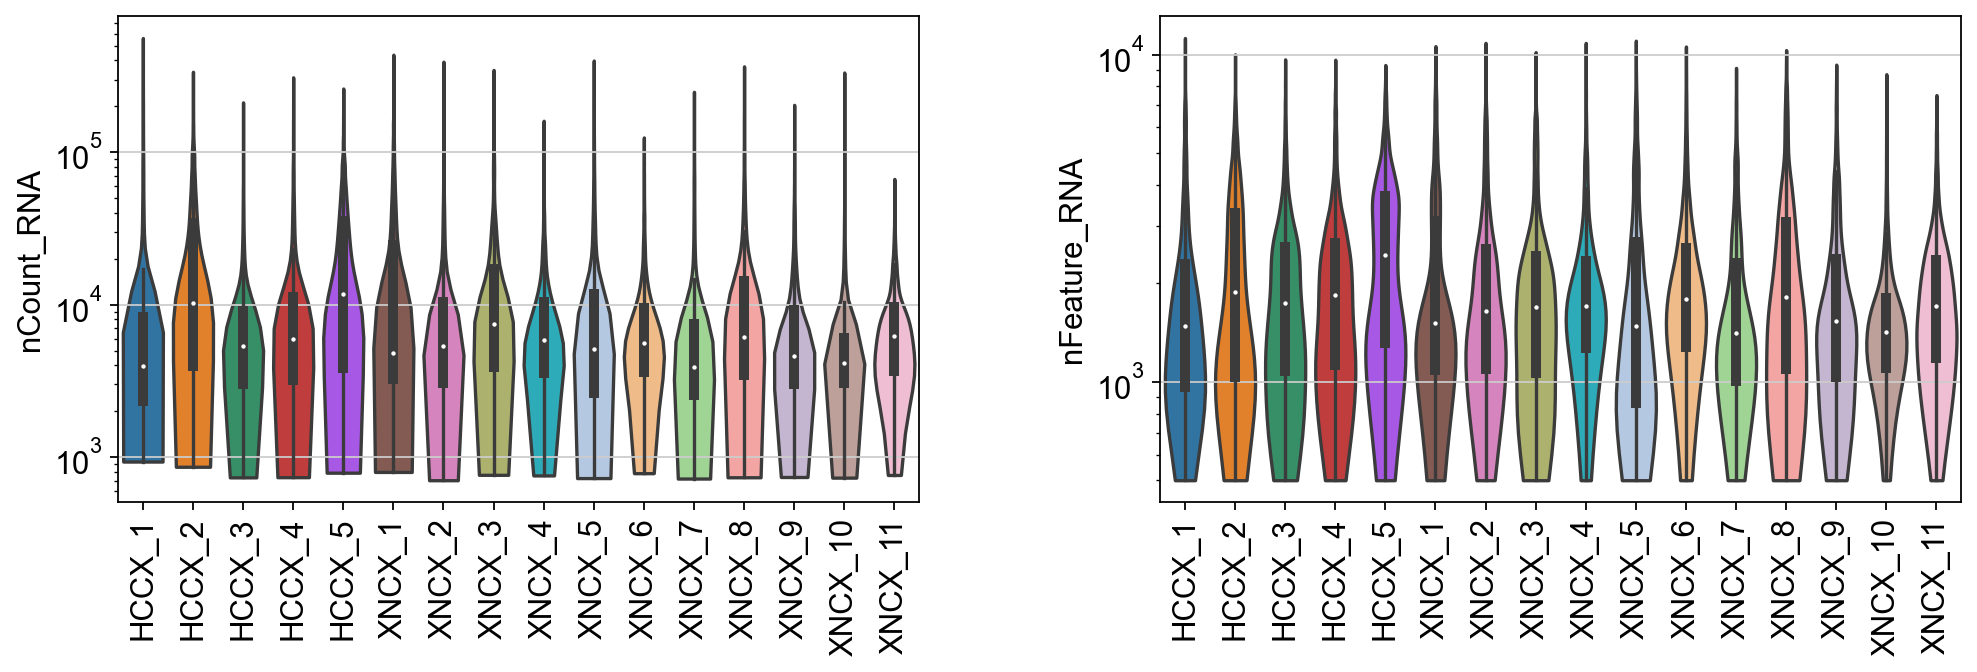

In [35]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (6, 4)}):
    sc.pl.violin(adata, ['nCount_RNA', 'nFeature_RNA'], log=True, groupby='orig.ident', stripplot=False, inner='box',rotation=90,
                save='rna_count.pdf')  
    # use stripplot=False to remove the internal dots, inner='box' adds a boxplot inside violins

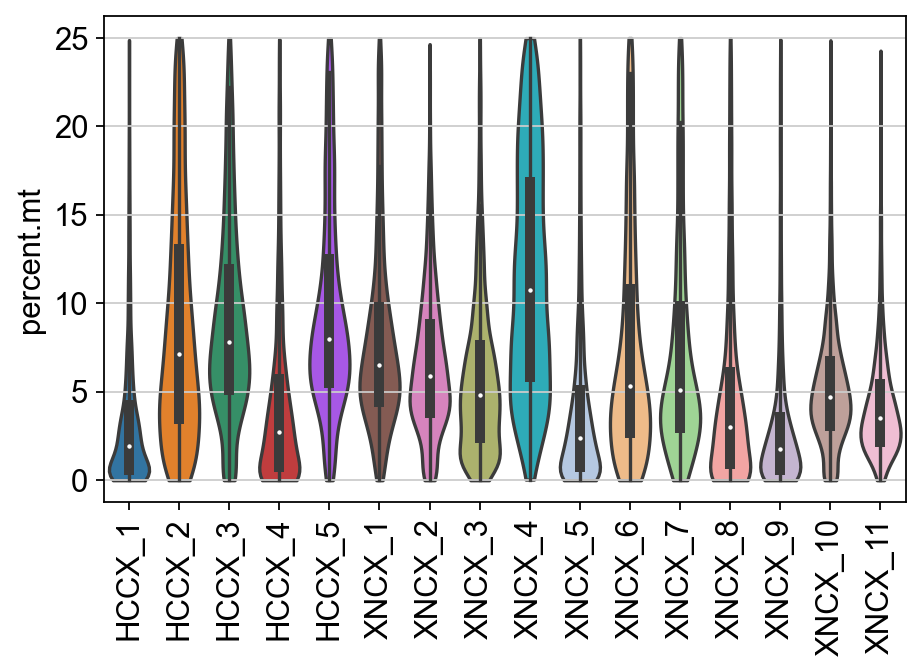

In [36]:
with rc_context({'figure.figsize': (6, 4)}):
    sc.pl.violin(adata, ['percent.mt'], log=False, groupby='orig.ident', stripplot=False, inner='box',rotation=90,
                 save='mt.pdf')  
    # use stripplot=False to remove the internal dots, inner='box' adds a boxplot inside violins

# Epithelial cells

In [4]:
#sub_adata=adata[adata.obs['celltype_major'].isin(['Serous_acini','Mucous_acini','Ductal','Myoepithelial'])]
sub_adata=sc.read_h5ad('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/s04_cx_epi.h5ad')
sub_adata

AnnData object with n_obs × n_vars = 27742 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'ident', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'sample', 'RNA_snn_res.2', 'seurat_clusters', 'celltype_submarkers', 'celltype_major', 'celltype_minor', 'cli_state'
    var: 'features'
    uns: 'celltype_major_colors', 'celltype_minor_colors', 'neighbors'
    obsm: 'X_PCA', 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    layers: 'scaled'
    obsp: 'distances'

## plot UMAP 

In [5]:
print (sub_adata.obsm['X_harmony'].shape)
print (sub_adata.obsm['X_pca'].shape)
print (sub_adata.obsm['X_PCA'].shape)

(27742, 30)
(27742, 30)
(27742, 30)


In [6]:
sc.pp.neighbors(sub_adata, n_pcs=30,use_rep='X_harmony')
sc.tl.umap(sub_adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:40)


In [21]:
sub_adata.obs['cli_state']

TCCAGAAGTAGTACGG-1_1     SjS
GTTGTCCGTATTTCCT-1_1     SjS
AAGATAGCAGCGTTGC-1_1     SjS
GTTTGGAGTCTACAAC-1_1     SjS
GTAATCGGTCACAATC-1_1     SjS
                        ... 
TATCAGGTCTAGAACC-1_16     HC
TCATTCACACAGCATT-1_16     HC
GTCTGTCAGAATTCAG-1_16     HC
GCAGGCTTCAACGCTA-1_16     HC
GTCAAACAGGGAGAAT-1_16     HC
Name: cli_state, Length: 27742, dtype: category
Categories (2, object): ['HC', 'SjS']

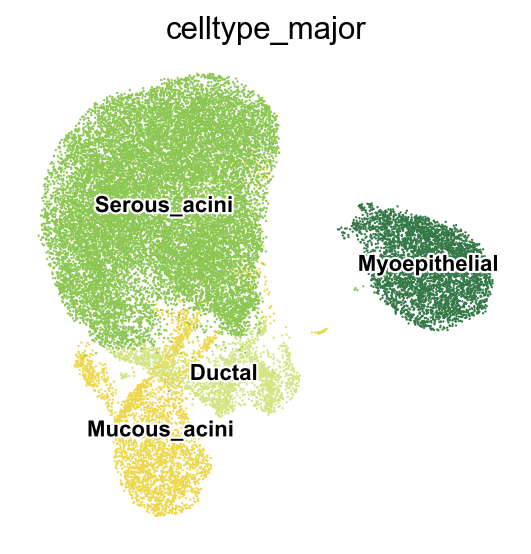

In [23]:
sc.pl.umap(sub_adata, color=['celltype_major'], legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2,palette=['#8DC753','#ECD84A', '#D3E583', '#357948'],save='epithelial_celltypes_umap.pdf')

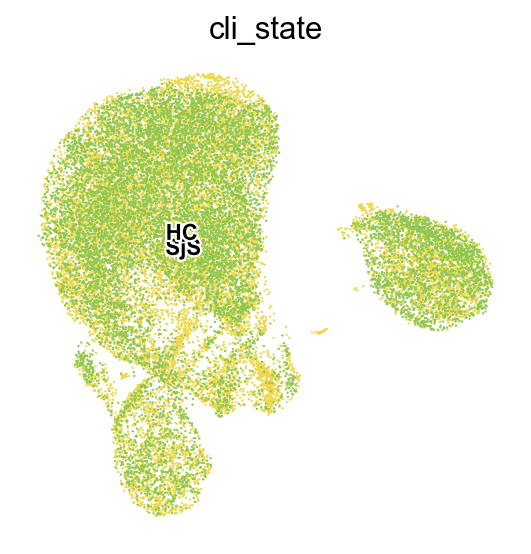

In [24]:
sc.pl.umap(sub_adata, color=['cli_state'], legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2,save='epithelial_cli-state_umap.pdf')

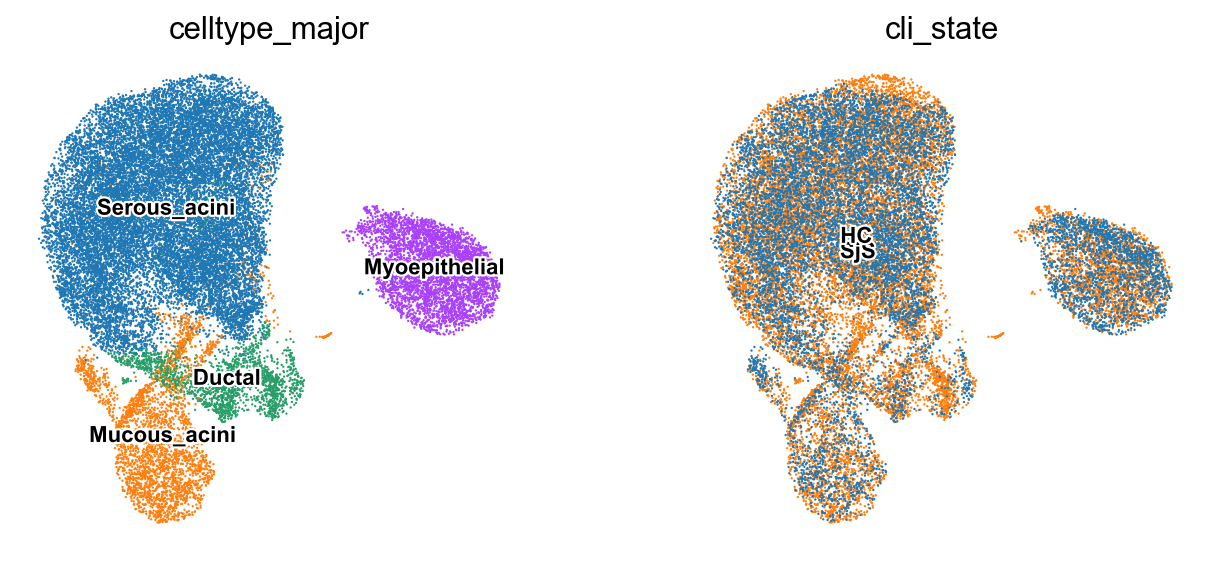

In [73]:
sc.pl.umap(sub_adata, color=['celltype_major','cli_state'], legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2,)

## Plot heatmap of subclusters of epithelial cells

In [255]:
df=pd.read_csv('./data/cx_epi_celltype_major_markers_df.csv',index_col=0)
df=df[(df['logfoldchanges'] >2) & (df['pvals_adj'] < 0.01) & (df['pct_nz_group']>0.25)]# 差异基因集的筛选标准
#marker_genes_dict=list(set(df['names']))

In [277]:
### Select top50 genes of each cluster
marker_genes_dict,marker_genes=[],[]
for i in ['Serous_acini','Mucous_acini','Ductal','Myoepithelial']:
    sub_df=df[df['celltype_major']==i]
    marker_genes_dict.extend(list(sub_df['names'])[:50])
    marker_genes.append(list(sub_df['names'])[:50])
    print (marker_genes_dict)
    print (len(marker_genes_dict))

['PIP', 'MUC7', 'LYZ', 'ZG16B', 'CRISP3', 'ODAM', 'GNAS', 'SLPI', 'LRRC26', 'C6orf58', 'S100A1', 'TCN1', 'TCIM', 'PIGR', 'CD24', 'CALML5', 'ELF5', 'AC020656.1', 'SLC31A2', 'CCL28', 'TESC', 'PLIN5', 'FDCSP', 'CLDN10', 'PRR4', 'ANKRD36C', 'LINC01829', 'SLC13A2', 'AZGP1', 'LPO', 'CEP41', 'LINC00342', 'NCALD', 'STATH', 'PKDCC', 'PLA2R1', 'MUC15', 'NPY1R', 'INPP5D', 'CCDC15', 'LTF', 'HPSE', 'CES3', 'ACTR3B', 'APCDD1L-DT', 'ASCL2', 'FMO5', 'RNASE1', 'VSIG10L', 'PTH2R']
50
['PIP', 'MUC7', 'LYZ', 'ZG16B', 'CRISP3', 'ODAM', 'GNAS', 'SLPI', 'LRRC26', 'C6orf58', 'S100A1', 'TCN1', 'TCIM', 'PIGR', 'CD24', 'CALML5', 'ELF5', 'AC020656.1', 'SLC31A2', 'CCL28', 'TESC', 'PLIN5', 'FDCSP', 'CLDN10', 'PRR4', 'ANKRD36C', 'LINC01829', 'SLC13A2', 'AZGP1', 'LPO', 'CEP41', 'LINC00342', 'NCALD', 'STATH', 'PKDCC', 'PLA2R1', 'MUC15', 'NPY1R', 'INPP5D', 'CCDC15', 'LTF', 'HPSE', 'CES3', 'ACTR3B', 'APCDD1L-DT', 'ASCL2', 'FMO5', 'RNASE1', 'VSIG10L', 'PTH2R', 'BPIFB2', 'TFF3', 'AGR2', 'MUC5B', 'GOLM1', 'TSPAN8', 'KLK11'

In [282]:
sub_df=pd.DataFrame(marker_genes)
sub_df.index=['Serous_acini','Mucous_acini','Ductal','Myoepithelial']
sub_df=sub_df.T
sub_df.to_csv('./analysis_result/supplementary/sFig2/top50_markerGenes_epithelial.csv')

In [272]:
sc.tl.dendrogram(sub_adata,groupby=['celltype_major','cli_state'],use_rep='X_PCA')

Storing dendrogram info using `.uns['dendrogram_celltype_major_cli_state']`


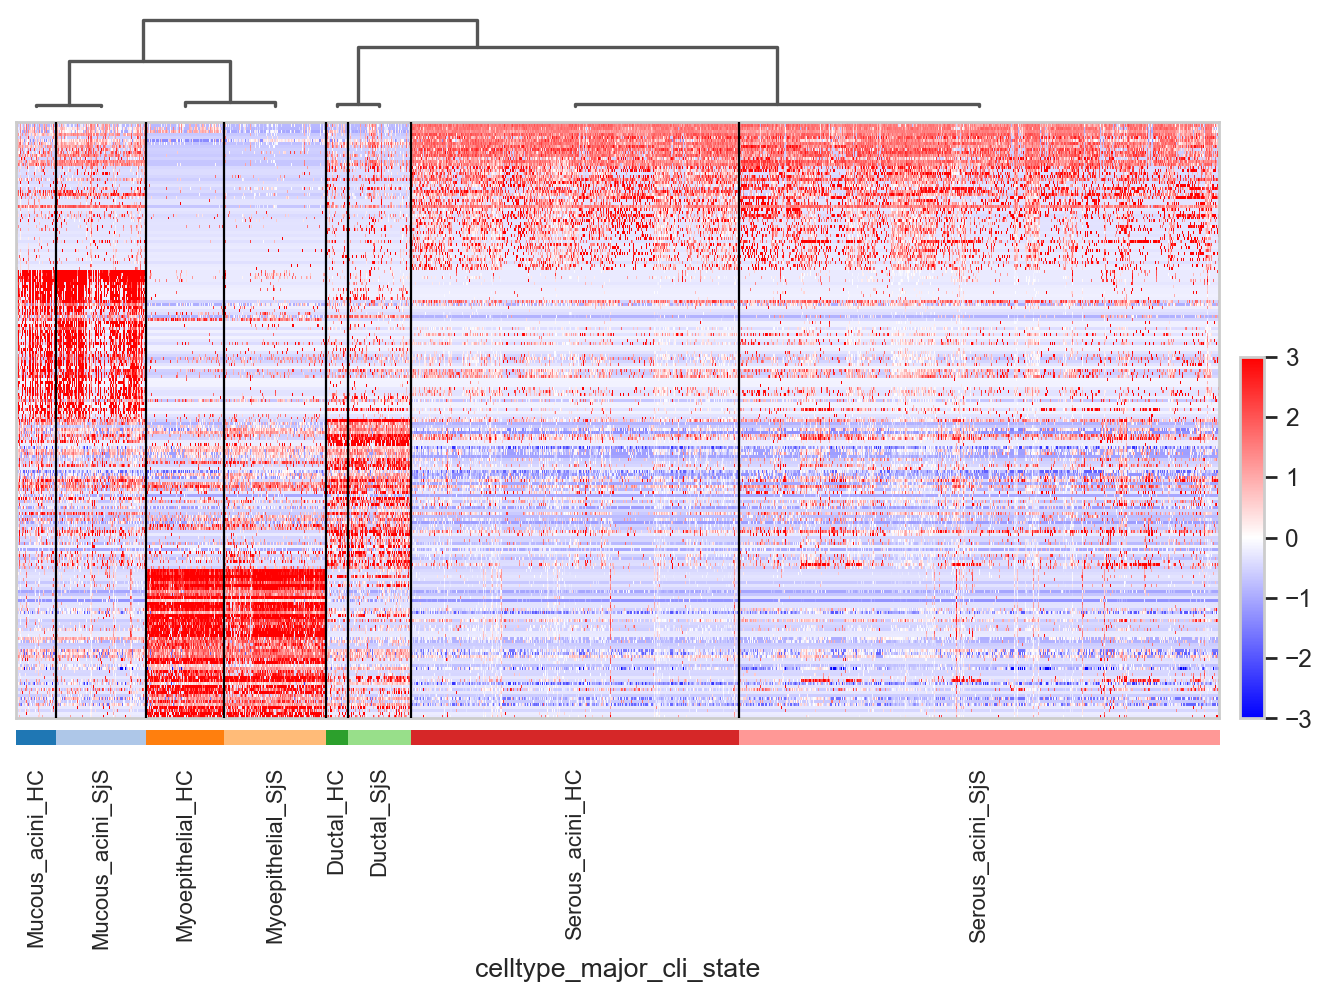

In [275]:
ax = sc.pl.heatmap(sub_adata, marker_genes_dict, groupby=['celltype_major','cli_state'], layer='scaled',show_gene_labels=False,
                   vmin=-3, vmax=3,cmap='bwr', dendrogram=True, swap_axes=True, figsize=(10,6),save='MarkerGenes_epithelial.pdf')

In [3]:
?sc.pl.heatmap

Signature:
sc.pl.heatmap(
    adata: anndata._core.anndata.AnnData,
    var_names: Union[str, Sequence[str], Mapping[str, Union[str, Sequence[str]]]],
    groupby: Union[str, Sequence[str]],
    use_raw: Optional[bool] = None,
    log: bool = False,
    num_categories: int = 7,
    dendrogram: Union[bool, str] = False,
    gene_symbols: Optional[str] = None,
    var_group_positions: Optional[Sequence[Tuple[int, int]]] = None,
    var_group_labels: Optional[Sequence[str]] = None,
    var_group_rotation: Optional[float] = None,
    layer: Optional[str] = None,
    standard_scale: Optional[Literal['var', 'obs']] = None,
    swap_axes: bool = False,
    show_gene_labels: Optional[bool] = None,
    show: Optional[bool] = None,
    save: Union[str, bool, NoneType] = None,
    figsize: Optional[Tuple[float, float]] = None,
    **kwds,
)
Docstring:
Heatmap of the expression values of genes.

If `groupby` is given, the heatmap is ordered by the respective group. For
example, a list of marker ge

## Plot ratio of subclusters

In [82]:
ratio_df=pd.read_csv('./data/cx_celltype_major_sample_proportion_2.csv',index_col=0)
ratio_df=ratio_df[ratio_df['celltype_major'].isin(['Serous_acini','Mucous_acini','Ductal','Myoepithelial'])]

In [146]:
ratio_df

celltype_major   sample  proportion cli_state
48          Ductal   HCCX_1    0.010465        HC
49          Ductal   HCCX_2    0.046217        HC
50          Ductal   HCCX_3    0.009760        HC
51          Ductal   HCCX_4    0.015145        HC
52          Ductal   HCCX_5    0.049416        HC
..             ...      ...         ...       ...
283   Serous_acini   XNCX_7    0.305533       SjS
284   Serous_acini   XNCX_8    0.271008       SjS
285   Serous_acini   XNCX_9    0.173019       SjS
286   Serous_acini  XNCX_10    0.055099       SjS
287   Serous_acini  XNCX_11    0.014666       SjS

[64 rows x 4 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HCCX_1'),
  Text(1, 0, 'HCCX_2'),
  Text(2, 0, 'HCCX_3'),
  Text(3, 0, 'HCCX_4'),
  Text(4, 0, 'HCCX_5'),
  Text(5, 0, 'XNCX_1'),
  Text(6, 0, 'XNCX_2'),
  Text(7, 0, 'XNCX_3'),
  Text(8, 0, 'XNCX_4'),
  Text(9, 0, 'XNCX_5'),
  Text(10, 0, 'XNCX_6'),
  Text(11, 0, 'XNCX_7'),
  Text(12, 0, 'XNCX_8'),
  Text(13, 0, 'XNCX_9'),
  Text(14, 0, 'XNCX_10'),
  Text(15, 0, 'XNCX_11')])

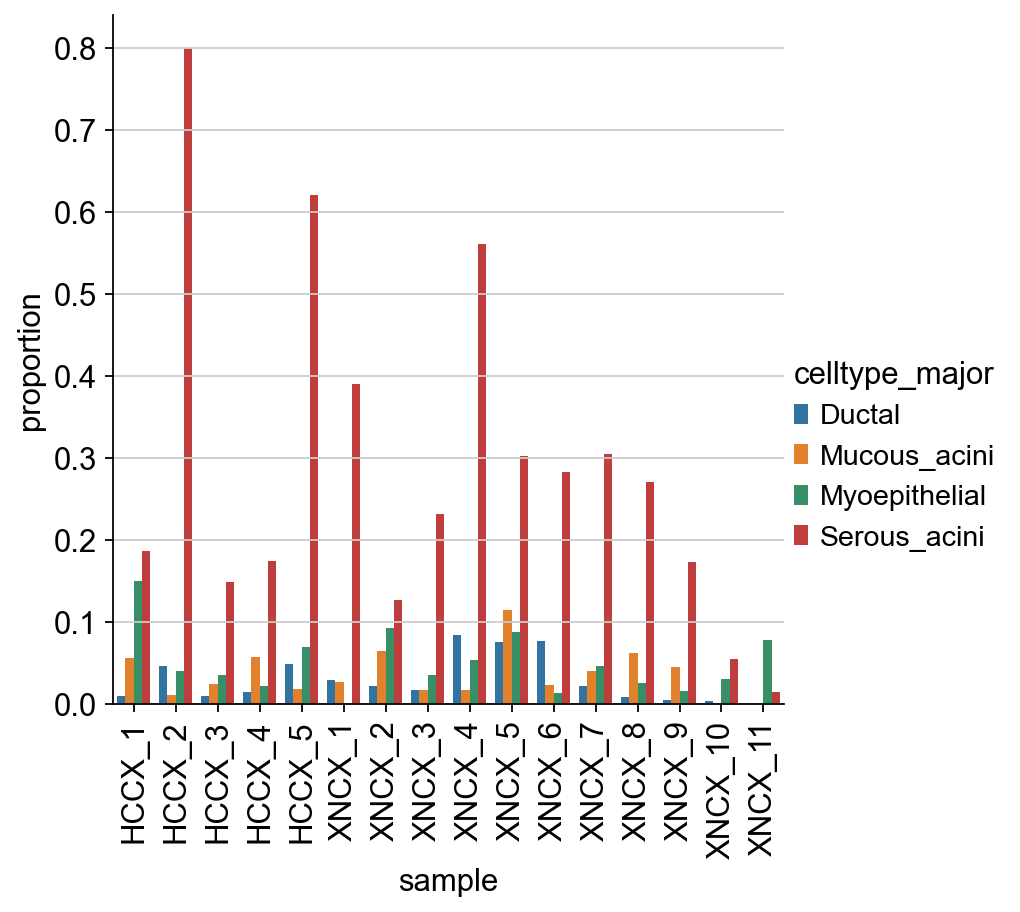

In [151]:
sns.catplot(x='sample',y='proportion',hue='celltype_major',data=ratio_df,kind="bar")
plt.xticks(rotation=90)

[Text(0, 0, 'Ductal'),
 Text(1, 0, 'Mucous_acini'),
 Text(2, 0, 'Myoepithelial'),
 Text(3, 0, 'Serous_acini')]

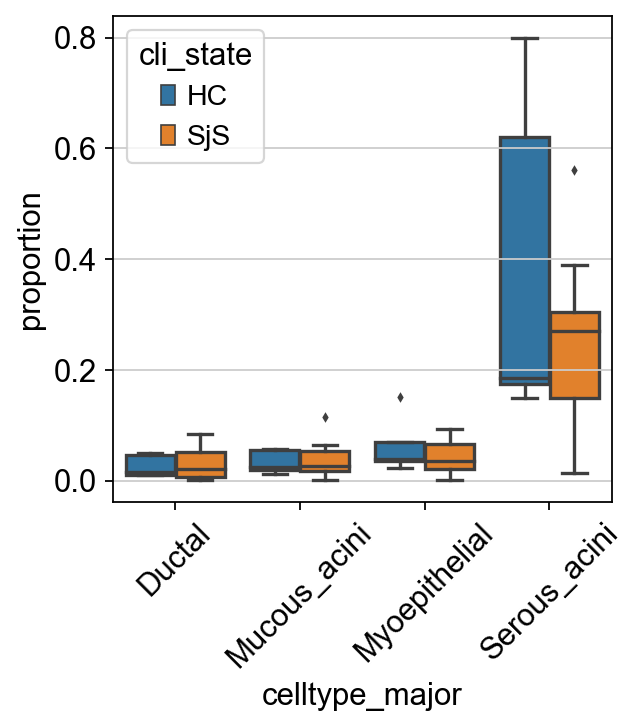

In [104]:
### Boxplot
ax=sns.boxplot(x='celltype_major',y='proportion',hue='cli_state',data=ratio_df,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

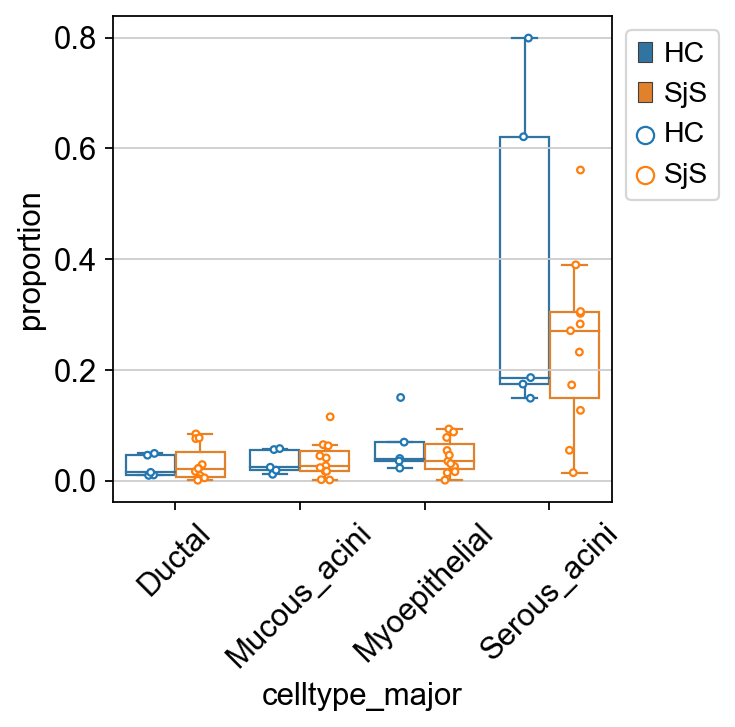

In [113]:
### modified boxplot
fig,ax=plt.subplots(figsize=(4,4))
sns.boxplot(data=ratio_df,y='proportion',x='celltype_major',hue='cli_state',ax=ax,fliersize=0,linewidth=1)
sns.stripplot(data=ratio_df,y='proportion',x='celltype_major',hue='cli_state',ax=ax,dodge=True,size=3,linewidth=1)
plt.xticks(rotation=45)
# box lines
for i, box in enumerate(ax.artists):
    color = box.get_facecolor()
    box.set_edgecolor(color)
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i, 6*(i+1)):
        ax.lines[j].set_color(color)

# scatter points
for coll in ax.collections:
    color = coll.get_facecolor()
    coll.set_edgecolor(color)
    coll.set_facecolor('white')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('./analysis_result/supplementary/sFig2/ratio_epithelial.pdf',bbox_inches='tight')
plt.show()

### Plot subcluster ratio in each sample

In [154]:
ratio_df=pd.read_csv('./data/cx_celltype_major_sample_proportion_1.csv',index_col=0)
ratio_df=ratio_df[['Serous_acini','Mucous_acini','Ductal','Myoepithelial']]

In [169]:
### normalization each row
import numpy
row_sums = ratio_df.sum(axis=1)
ratio_df=ratio_df / row_sums[:, numpy.newaxis]

/tmp/ipykernel_84374/2109559899.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratio_df=ratio_df / row_sums[:, numpy.newaxis]


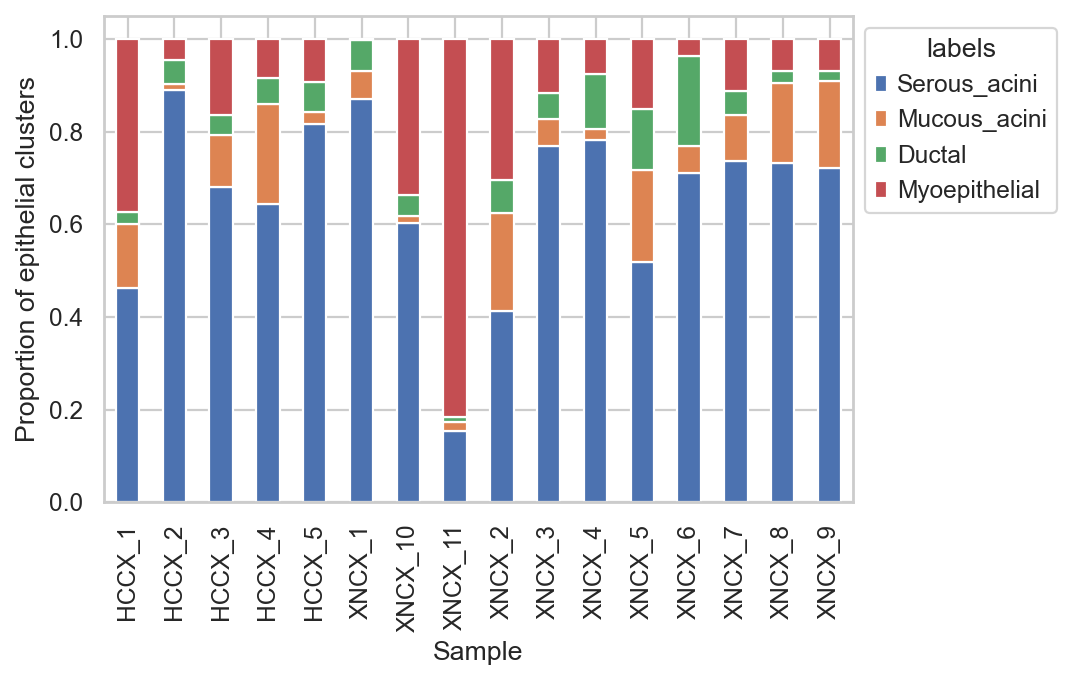

In [196]:
sns.set_style('whitegrid')
ratio_df.plot(kind='bar', stacked=True,figsize=(6, 4))
# labels for x & y axis
plt.xlabel('Sample')
plt.ylabel('Proportion of epithelial clusters')
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.savefig('./analysis_result/supplementary/sFig2/ratio_epithelial_stackedPlot.pdf')  # if needed
plt.show()

# Endothelial cells

In [4]:
### Loading data
sub_adata=sc.read_h5ad('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/s09_cx_endo.h5ad')
sub_adata

AnnData object with n_obs × n_vars = 4291 × 36601
    obs: 'sample', 'celltype_submarkers', 'celltype_major', 'celltype_minor', 'cli_state'
    var: 'features'
    uns: 'celltype_major_colors', 'celltype_minor_colors', 'neighbors'
    obsm: 'X_PCA', 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    layers: 'scaled'
    obsp: 'distances'

In [5]:
### Set new category
sub_adata.obs['celltype_state']=list(map('-'.join, zip(sub_adata.obs['celltype_minor'],sub_adata.obs['cli_state'])))
sub_adata.obs['celltype_state']=sub_adata.obs['celltype_state'].astype('category')
#sub_adata.obs['celltype_state'].cat.set_categories(['Endothelial_CA4-SjS','Endothelial_CA4-HC', 'Endothelial_ACKR1_CCL14-SjS','Endothelial_ACKR1_CCL14-HC', 'Endothelial_RGS5-SjS','Endothelial_RGS5-HC'])

In [6]:
sub_adata.obs.groupby('celltype_minor').count()
sub_adata.obs

sample               celltype_submarkers  \
TCTGTCGGTATACAGA-1_1   XNCX_1      Endothelial_ACKR1_SELE_CCL14   
TCGACGGTCCGGTTCT-1_1   XNCX_1      Endothelial_ACKR1_SELE_CCL14   
ATTTCTGTCACTTCTA-1_1   XNCX_1      Endothelial_ACKR1_SELE_CCL14   
AGACAAAGTCACTCGG-1_1   XNCX_1          Endothelial_RGCC_CA4_PIP   
GTGTAACGTATCCTCC-1_1   XNCX_1  Endothelial_RGS5_NDUFA4L2_IGFBP3   
...                       ...                               ...   
TTGCATTGTCTCGGGT-1_16  HCCX_5          Endothelial_RGCC_CA4_PIP   
TCTTGCGAGTTCAACC-1_16  HCCX_5          Endothelial_RGCC_CA4_PIP   
GGTGAAGGTCTAGGTT-1_16  HCCX_5          Endothelial_RGCC_CA4_PIP   
TCAGCAATCGATTGGT-1_16  HCCX_5          Endothelial_RGCC_CA4_PIP   
GGAGAACAGTTGTACC-1_16  HCCX_5          Endothelial_RGCC_CA4_PIP   

                      celltype_major           celltype_minor cli_state  \
TCTGTCGGTATACAGA-1_1     Endothelial  Endothelial_ACKR1_CCL14       SjS   
TCGACGGTCCGGTTCT-1_1     Endothelial  Endothelial_ACKR1_CCL14       SjS   
ATTTCTGTCACTTCTA-1_1     Endothelial  Endothelial_ACKR1_CCL14       SjS   
AGACAAAGTCACTCGG-1_1     Endothelial          Endothelial_CA4       SjS   
GTGTAACGTATCCTCC-1_1     Endothelial         Endothelial_RGS5       SjS   
...                              ...                      ...       ...   
TTGCATTGTCTCGGGT-1_16    Endothelial          Endothelial_CA4        HC   
TCTTGCGAGTTCAACC-1_16    Endothelial          Endothelial_CA4        HC   
GGTGAAGGTCTAGGTT-1_16    Endothelial          Endothelial_CA4        HC   
TCAGCAATCGATTGGT-1_16    Endothelial          Endothelial_CA4        HC   
GGAGAACAGTTGTACC-1_16    Endothelial          Endothelial_CA4        HC   

                                    celltype_state  
TCTGTCGGTATACAGA-1_1   Endothelial_ACKR1_CCL14-SjS  
TCGACGGTCCGGTTCT-1_1   Endothelial_ACKR1_CCL14-SjS  
ATTTCTGTCACTTCTA-1_1   Endothelial_ACKR1_CCL14-SjS  
AGACAAAGTCACTCGG-1_1           Endothelial_CA4-SjS  
GTGTAACGTATCCTCC-1_1          Endothelial_RGS5-SjS  
...                                            ...  
TTGCATTGTCTCGGGT-1_16           Endothelial_CA4-HC  
TCTTGCGAGTTCAACC-1_16           Endothelial_CA4-HC  
GGTGAAGGTCTAGGTT-1_16           Endothelial_CA4-HC  
TCAGCAATCGATTGGT-1_16           Endothelial_CA4-HC  
GGAGAACAGTTGTACC-1_16           Endothelial_CA4-HC  

[4291 rows x 6 columns]

## Computing connectivity by PAGA

In [33]:
sc.pp.neighbors(sub_adata, n_pcs=30,use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [34]:
sc.tl.paga(sub_adata,groups='celltype_state')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


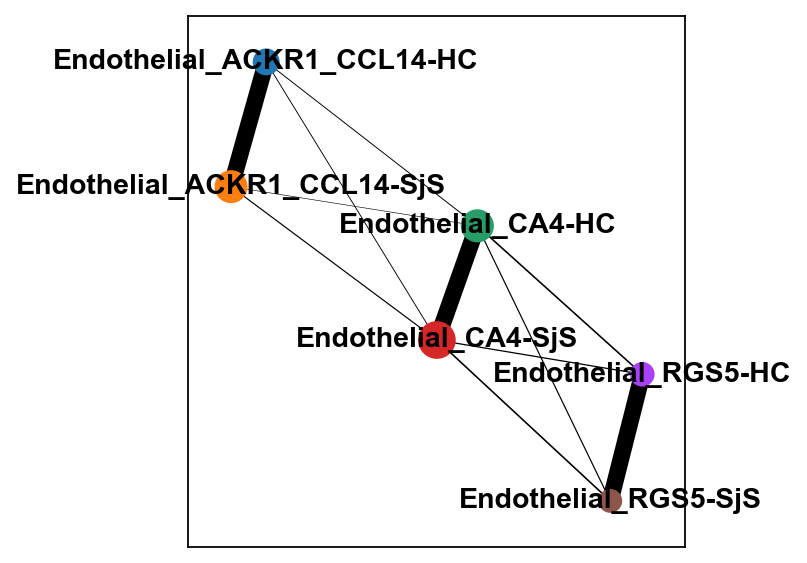

In [38]:
sc.pl.paga(sub_adata,save='PAGA_endothelial.pdf')

## Plot heatmap of subclusters of endothelial cells

In [12]:
df=pd.read_csv('./data/cx_endo_celltype_minor_degs.csv',index_col=0)
df=df[(df['logfoldchanges'] >1) & (df['pvals_adj'] < 0.01) & (df['pct_nz_group']>0.25)]# 差异基因集的筛选标准
#marker_genes_dict=list(set(df['names']))

In [13]:
### Select top50 genes of each cluster
marker_genes_dict,marker_genes=[],[]
for i in ['Endothelial_ACKR1', 'Endothelial_CA4', 'Endothelial_RGS5']:
    sub_df=df[df['cluster']==i]
    marker_genes_dict.extend(list(sub_df['names'])[:50])
    marker_genes.append(list(sub_df['names'])[:50])
print (marker_genes_dict)
print (len(marker_genes_dict))

['ACKR1', 'CCL14', 'CLU', 'SELP', 'SELE', 'PRCP', 'TSPAN7', 'IL1R1', 'CSRP2', 'ZNF385D', 'IL33', 'NR2F2', 'CTSC', 'NNMT', 'NPC2', 'CSF2RB', 'VCAM1', 'TFPI', 'SNCG', 'CCL23', 'OLFM1', 'HAPLN3', 'ACTN1', 'PDLIM1', 'UGCG', 'COTL1', 'ADIRF', 'PDIA5', 'LPCAT4', 'TPD52L1', 'MYOF', 'PIM3', 'CST3', 'DUSP23', 'MMRN1', 'RHOU', 'CALML4', 'MEOX1', 'PERP', 'TOMM5', 'ARL4A', 'RGS16', 'FKBP1A', 'LHX6', 'RPL12', 'SYT15', 'TNFAIP3', 'MEOX2', 'CPXM2', 'PRXL2A', 'RGCC', 'CA4', 'SLC9A3R2', 'CXCL12', 'PLPP3', 'PODXL', 'EDNRB', 'BTNL9', 'SLC14A1', 'PDGFD', 'PIP', 'ITGA1', 'TCIM', 'LYZ', 'MUC7', 'CCN3', 'CLIC5', 'ITIH5', 'IGKC', 'PLAU', 'GJA4', 'CALD1', 'LGALS1', 'NDUFA4L2', 'GUCY1A1', 'RGS5', 'HES4', 'PPP1R14A', 'MYL9', 'MFGE8', 'IGFBP5', 'STEAP4', 'CPE', 'PRRX1', 'NOTCH3', 'CXCL12', 'SEMA3G', 'ADGRF5', 'RHOB', 'JAG1', 'EFNB2', 'ABCC9', 'EMP3', 'LHFPL6', 'UTRN', 'COX4I2', 'FILIP1L', 'LTBP4', 'PDGFRB', 'ITGB1', 'HEY1', 'PMEPA1', 'CAV1', 'FN1', 'MAP1B', 'FABP4', 'MYO1B', 'ACE', 'PLPP1', 'PODXL', 'EPS8', 'SPEC

In [29]:
sub_df=pd.DataFrame(marker_genes)
sub_df.index=['Endothelial_ACKR1', 'Endothelial_CA4', 'Endothelial_RGS5']
sub_df=sub_df.T
sub_df.to_csv('./analysis_result/supplementary/sFig3/top50_markerGenes_endothelial.csv')

In [10]:
sc.tl.dendrogram(sub_adata,groupby=['celltype_minor','cli_state'],use_rep='X_PCA')

Storing dendrogram info using `.uns['dendrogram_celltype_minor_cli_state']`


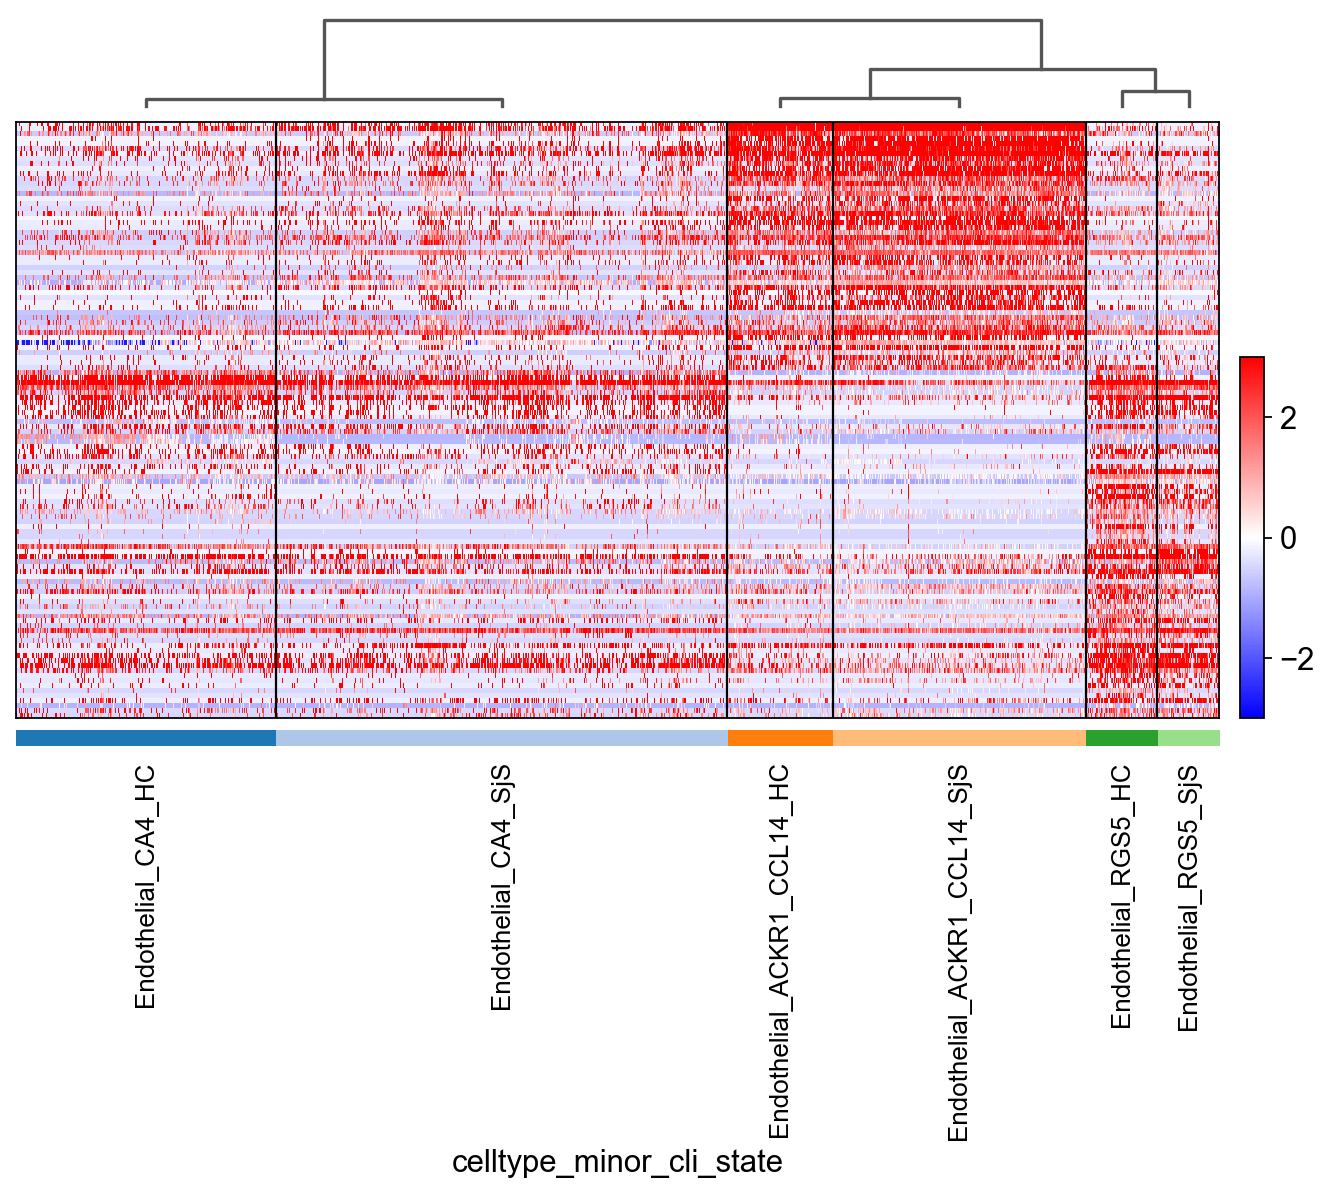

In [21]:
ax = sc.pl.heatmap(sub_adata, marker_genes_dict, groupby=['celltype_minor','cli_state'], layer='scaled',show_gene_labels=False,
                   vmin=-3, vmax=3,cmap='bwr', dendrogram=True, swap_axes=True, figsize=(10,6),save='MarkerGenes_endothelial.pdf')

# Immune cells (SG+PBMC)

In [23]:
### Loading MetaData
#adata=sc.read_h5ad('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/cx_pbmc_all.h5ad')
#adata.obs.to_csv('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/cx_pbmc_meta.csv')
meta_df=pd.read_csv('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/cx_pbmc_meta.csv',index_col=0,low_memory=False)
meta_df

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
TCCAGAAGTAGTACGG-1_1       XNCX_1    436077.0         10126    4.088727   
GTTGTCCGTATTTCCT-1_1       XNCX_1    352962.0          7663    4.699089   
AAGATAGCAGCGTTGC-1_1       XNCX_1    311412.0          7930    4.528085   
GTTTGGAGTCTACAAC-1_1       XNCX_1    296501.0          7854    2.682622   
GTAATCGGTCACAATC-1_1       XNCX_1    296398.0          7766    5.652872   
...                           ...         ...           ...         ...   
ATACCTTGTTCTGACA-1_8_2       HC_3      1553.0           830    5.666452   
TTTGGAGTCGCATTAG-1_8_2       HC_3      1495.0           904    8.494983   
GAACACTCAACCGATT-1_8_2       HC_3      1426.0           808    9.677419   
CTGGCAGCAGTCCCGA-1_8_2       HC_3      1449.0           817   13.802622   
ATTCACTGTAATGATG-1_8_2       HC_3      1187.0           806    5.475990   

                         ident scDblFinder.sample scDblFinder.class  \
TCCAGAAGTAGTACGG-1_1    XNCX_1             XNCX_1           singlet   
GTTGTCCGTATTTCCT-1_1    XNCX_1             XNCX_1           singlet   
AAGATAGCAGCGTTGC-1_1    XNCX_1             XNCX_1           singlet   
GTTTGGAGTCTACAAC-1_1    XNCX_1             XNCX_1           singlet   
GTAATCGGTCACAATC-1_1    XNCX_1             XNCX_1           singlet   
...                        ...                ...               ...   
ATACCTTGTTCTGACA-1_8_2    HC_3               HC_3           singlet   
TTTGGAGTCGCATTAG-1_8_2    HC_3               HC_3           singlet   
GAACACTCAACCGATT-1_8_2    HC_3               HC_3           singlet   
CTGGCAGCAGTCCCGA-1_8_2    HC_3               HC_3           singlet   
ATTCACTGTAATGATG-1_8_2    HC_3               HC_3           singlet   

                        scDblFinder.score  scDblFinder.weighted  \
TCCAGAAGTAGTACGG-1_1             0.025335              0.314656   
GTTGTCCGTATTTCCT-1_1             0.004421              0.170975   
AAGATAGCAGCGTTGC-1_1             0.001616              0.172666   
GTTTGGAGTCTACAAC-1_1             0.005489              0.177036   
GTAATCGGTCACAATC-1_1             0.002438              0.107813   
...                                   ...                   ...   
ATACCTTGTTCTGACA-1_8_2           0.001300              0.125513   
TTTGGAGTCGCATTAG-1_8_2           0.000046              0.041745   
GAACACTCAACCGATT-1_8_2           0.004670              0.116749   
CTGGCAGCAGTCCCGA-1_8_2           0.003672              0.112462   
ATTCACTGTAATGATG-1_8_2           0.000600              0.100807   

                        scDblFinder.cxds_score  sample  seurat_clusters  \
TCCAGAAGTAGTACGG-1_1                  1.000000  XNCX_1                7   
GTTGTCCGTATTTCCT-1_1                  0.534438  XNCX_1               10   
AAGATAGCAGCGTTGC-1_1                  0.999914  XNCX_1               10   
GTTTGGAGTCTACAAC-1_1                  0.535748  XNCX_1               10   
GTAATCGGTCACAATC-1_1                  0.536283  XNCX_1               10   
...                                        ...     ...              ...   
ATACCTTGTTCTGACA-1_8_2                0.033355    HC_3               10   
TTTGGAGTCGCATTAG-1_8_2                0.019434    HC_3               14   
GAACACTCAACCGATT-1_8_2                0.036930    HC_3                8   
CTGGCAGCAGTCCCGA-1_8_2                0.029239    HC_3               21   
ATTCACTGTAATGATG-1_8_2                0.023033    HC_3                8   

                                     celltype_submarkers celltype_major  \
TCCAGAAGTAGTACGG-1_1       Serous_acini_MUC7_CRISP3_PIGR   Serous_acini   
GTTGTCCGTATTTCCT-1_1    Serous_acini_CLDN10_PRDX4_SEC11C   Serous_acini   
AAGATAGCAGCGTTGC-1_1    Serous_acini_CLDN10_PRDX4_SEC11C   Serous_acini   
GTTTGGAGTCTACAAC-1_1    Serous_acini_CLDN10_PRDX4_SEC11C   Serous_acini   
GTAATCGGTCACAATC-1_1    Serous_acini_CLDN10_PRDX4_SEC11C   Serous_acini   
...                                                  ...            ...   
ATACCTTGTTCTGACA-1_8_2                

In [22]:
#adata=sc.read_h5ad('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/s14_cx_pbmc_immune_inte_seurat_rpca_pc20_neighbor50.h5ad')
adata=sc.read_h5ad('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/s14_cx_pbmc_immune_inte_seurat_rpca_pc20_neighbor50_inte_assay.h5ad')
adata

/home/caipengfei/miniconda3/envs/multiclustering/lib/python3.9/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 79596 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'ident', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'sample', 'RNA_snn_res.2', 'seurat_clusters', 'celltype_submarkers', 'celltype_major', 'celltype_minor', 'RNA_snn_res.1', 'RNA_snn_res.1.5', 'tissue', 'RNA_snn_res.0.5', 'integrated_snn_res.2', 'integrated_snn_res.1.5', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.2.5', 'integrated_snn_res.3'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [24]:
adata.obs=meta_df.loc[adata.obs.index]
adata.obs.head()

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
GGAGAACCAACGGCTC-1_1_1         CX     29874.0          2213    0.669478   
GCCATGGTCCCATTCG-1_1_1         CX     26995.0          2692    3.126505   
ACCCTTGCAACTTGCA-1_1_1         CX     25616.0          1805    0.698782   
TTCCGGTCAGTACTAC-1_1_1         CX     25288.0          2145    2.064220   
TTCGATTCAAGTGGTG-1_1_1         CX     25111.0          2023    0.485843   

                         ident scDblFinder.sample scDblFinder.class  \
GGAGAACCAACGGCTC-1_1_1  XNCX_1             XNCX_1           singlet   
GCCATGGTCCCATTCG-1_1_1  XNCX_1             XNCX_1           singlet   
ACCCTTGCAACTTGCA-1_1_1  XNCX_1             XNCX_1           singlet   
TTCCGGTCAGTACTAC-1_1_1  XNCX_1             XNCX_1           singlet   
TTCGATTCAAGTGGTG-1_1_1  XNCX_1             XNCX_1           singlet   

                        scDblFinder.score  scDblFinder.weighted  \
GGAGAACCAACGGCTC-1_1_1           0.077716              0.241938   
GCCATGGTCCCATTCG-1_1_1           0.100488              0.268660   
ACCCTTGCAACTTGCA-1_1_1           0.003645              0.188472   
TTCCGGTCAGTACTAC-1_1_1           0.003885              0.154595   
TTCGATTCAAGTGGTG-1_1_1           0.009338              0.046406   

                        scDblFinder.cxds_score  sample  seurat_clusters  \
GGAGAACCAACGGCTC-1_1_1            4.765032e-06  XNCX_1               20   
GCCATGGTCCCATTCG-1_1_1            3.043927e-01  XNCX_1               16   
ACCCTTGCAACTTGCA-1_1_1            1.868295e-62  XNCX_1                0   
TTCCGGTCAGTACTAC-1_1_1            2.740662e-56  XNCX_1               16   
TTCGATTCAAGTGGTG-1_1_1            2.640603e-01  XNCX_1               16   

                                 celltype_submarkers celltype_major  \
GGAGAACCAACGGCTC-1_1_1  Plasma_IGKV2D-28_IGKC_JCHAIN         Plasma   
GCCATGGTCCCATTCG-1_1_1  Plasma_IGKV2D-28_IGKC_JCHAIN         Plasma   
ACCCTTGCAACTTGCA-1_1_1  Plasma_IGKV2D-28_IGKC_JCHAIN          CD4_T   
TTCCGGTCAGTACTAC-1_1_1  Plasma_IGKV2D-28_IGKC_JCHAIN         Plasma   
TTCGATTCAAGTGGTG-1_1_1  Plasma_IGKV2D-28_IGKC_JCHAIN         Plasma   

                          celltype_minor cli_state tissue  
GGAGAACCAACGGCTC-1_1_1  Plasma_IGKV2D-28       SjS     SG  
GCCATGGTCCCATTCG-1_1_1      Plasma_IGHA1       SjS     SG  
ACCCTTGCAACTTGCA-1_1_1       T_CD4_ADTRP       SjS     SG  
TTCCGGTCAGTACTAC-1_1_1      Plasma_IGHA1       SjS     SG  
TTCGATTCAAGTGGTG-1_1_1      Plasma_IGHA1       SjS     SG

In [24]:
### Set new category
adata.obs['state']=list(map('-'.join, zip(adata.obs['cli_state'],adata.obs['tissue'])))
adata.obs['celltype_major']=adata.obs['celltype_major'].astype('category')
adata.obs['celltype_minor']=adata.obs['celltype_minor'].astype('category')
adata.obs['cli_state']=adata.obs['cli_state'].astype('category')
adata.obs['tissue']=adata.obs['tissue'].astype('category')
#
#adata.obs['celltype_state']=list(map('-'.join, zip(adata.obs['celltype_minor'],adata.obs['state'])))
#adata.obs['celltype_state']=adata.obs['celltype_state'].astype('category')
#
#adata.obs['celltype_state']=list(map('-'.join, zip(adata.obs['celltype_major'],adata.obs['state'])))
#adata.obs['celltype_state']=adata.obs['celltype_state'].astype('category')

In [8]:
#set(adata.obs['tissue'])
#set(adata.obs['celltype_minor'])
#set(adata.obs['celltype_major'])
set(adata.obs['celltype_state'])

{'B-HC-PBMC',
 'B-HC-SG',
 'B-SjS-PBMC',
 'B-SjS-SG',
 'CD4_T-HC-PBMC',
 'CD4_T-HC-SG',
 'CD4_T-SjS-PBMC',
 'CD4_T-SjS-SG',
 'CD8_T-HC-PBMC',
 'CD8_T-HC-SG',
 'CD8_T-SjS-PBMC',
 'CD8_T-SjS-SG',
 'Cycling_T-HC-PBMC',
 'Cycling_T-HC-SG',
 'Cycling_T-SjS-PBMC',
 'Cycling_T-SjS-SG',
 'MAIT-HC-PBMC',
 'MAIT-HC-SG',
 'MAIT-SjS-PBMC',
 'MAIT-SjS-SG',
 'Mac/mo-HC-PBMC',
 'Mac/mo-HC-SG',
 'Mac/mo-SjS-PBMC',
 'Mac/mo-SjS-SG',
 'Mast-HC-PBMC',
 'Mast-HC-SG',
 'Mast-SjS-PBMC',
 'Mast-SjS-SG',
 'NK-HC-PBMC',
 'NK-HC-SG',
 'NK-SjS-PBMC',
 'NK-SjS-SG',
 'Plasma-HC-PBMC',
 'Plasma-HC-SG',
 'Plasma-SjS-PBMC',
 'Plasma-SjS-SG',
 'cDC-HC-PBMC',
 'cDC-HC-SG',
 'cDC-SjS-PBMC',
 'cDC-SjS-SG',
 'gdT-HC-PBMC',
 'gdT-HC-SG',
 'gdT-SjS-PBMC',
 'gdT-SjS-SG'}

## Computing connectivity by PAGA

In [9]:
sc.pp.neighbors(adata, n_pcs=50,use_rep='X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:38)


In [10]:
sc.tl.paga(adata,groups='celltype_state')

/home/caipengfei/miniconda3/envs/multiclustering/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/caipengfei/miniconda3/envs/multiclustering/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ident' as categorical
/home/caipengfei/miniconda3/envs/multiclustering/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.re

In [11]:
adata

AnnData object with n_obs × n_vars = 79596 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'ident', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'sample', 'seurat_clusters', 'celltype_submarkers', 'celltype_major', 'celltype_minor', 'cli_state', 'tissue', 'state', 'celltype_state'
    var: 'features'
    uns: 'neighbors', 'paga', 'celltype_state_sizes'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

--> added 'pos', the PAGA positions (adata.uns['paga'])


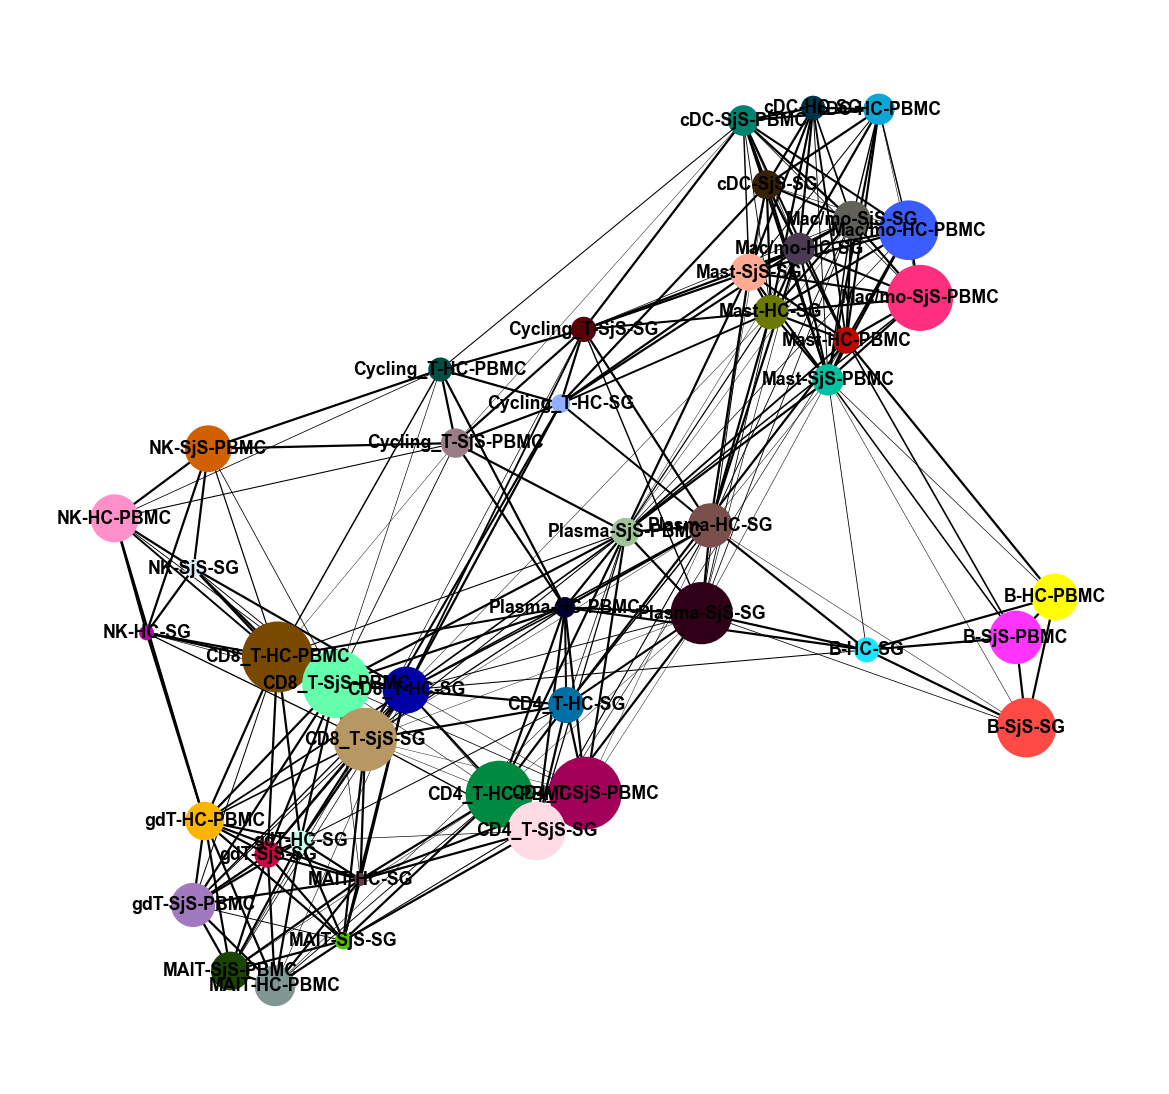

In [32]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.paga(adata, threshold=0.05, fontsize=8, frameon=False,
               node_size_scale=2, edge_width_scale=0.5, min_edge_width=0.05, max_edge_width=1,save='PAGA_ImmuneCells.pdf')

## Correlation between these subtypes

In [25]:
sc.tl.dendrogram(adata,groupby=['celltype_major','cli_state','tissue'],use_rep='X_pca')

Storing dendrogram info using `.uns['dendrogram_celltype_major_cli_state_tissue']`


In [31]:
?sc.pl.correlation_matrix

Signature:
sc.pl.correlation_matrix(
    adata: anndata._core.anndata.AnnData,
    groupby: str,
    show_correlation_numbers: bool = False,
    dendrogram: Union[bool, str, NoneType] = None,
    figsize: Optional[Tuple[float, float]] = None,
    show: Optional[bool] = None,
    save: Union[str, bool, NoneType] = None,
    ax: Optional[matplotlib.axes._axes.Axes] = None,
    **kwds,
) -> Union[matplotlib.axes._axes.Axes, List[matplotlib.axes._axes.Axes]]
Docstring:
Plots the correlation matrix computed as part of `sc.tl.dendrogram`.

Parameters
----------
adata : AnnData
groupby : str
    Categorical data column used to create the dendrogram
show_correlation_numbers : bool, optional (default: False)
    If `show_correlation=True`, plot the correlation on top of each cell.
dendrogram : typing.Union[bool, str, NoneType], optional (default: None)
    If True or a valid dendrogram key, a dendrogram based on the
    hierarchical clustering between the `groupby` categories is added.
    The 

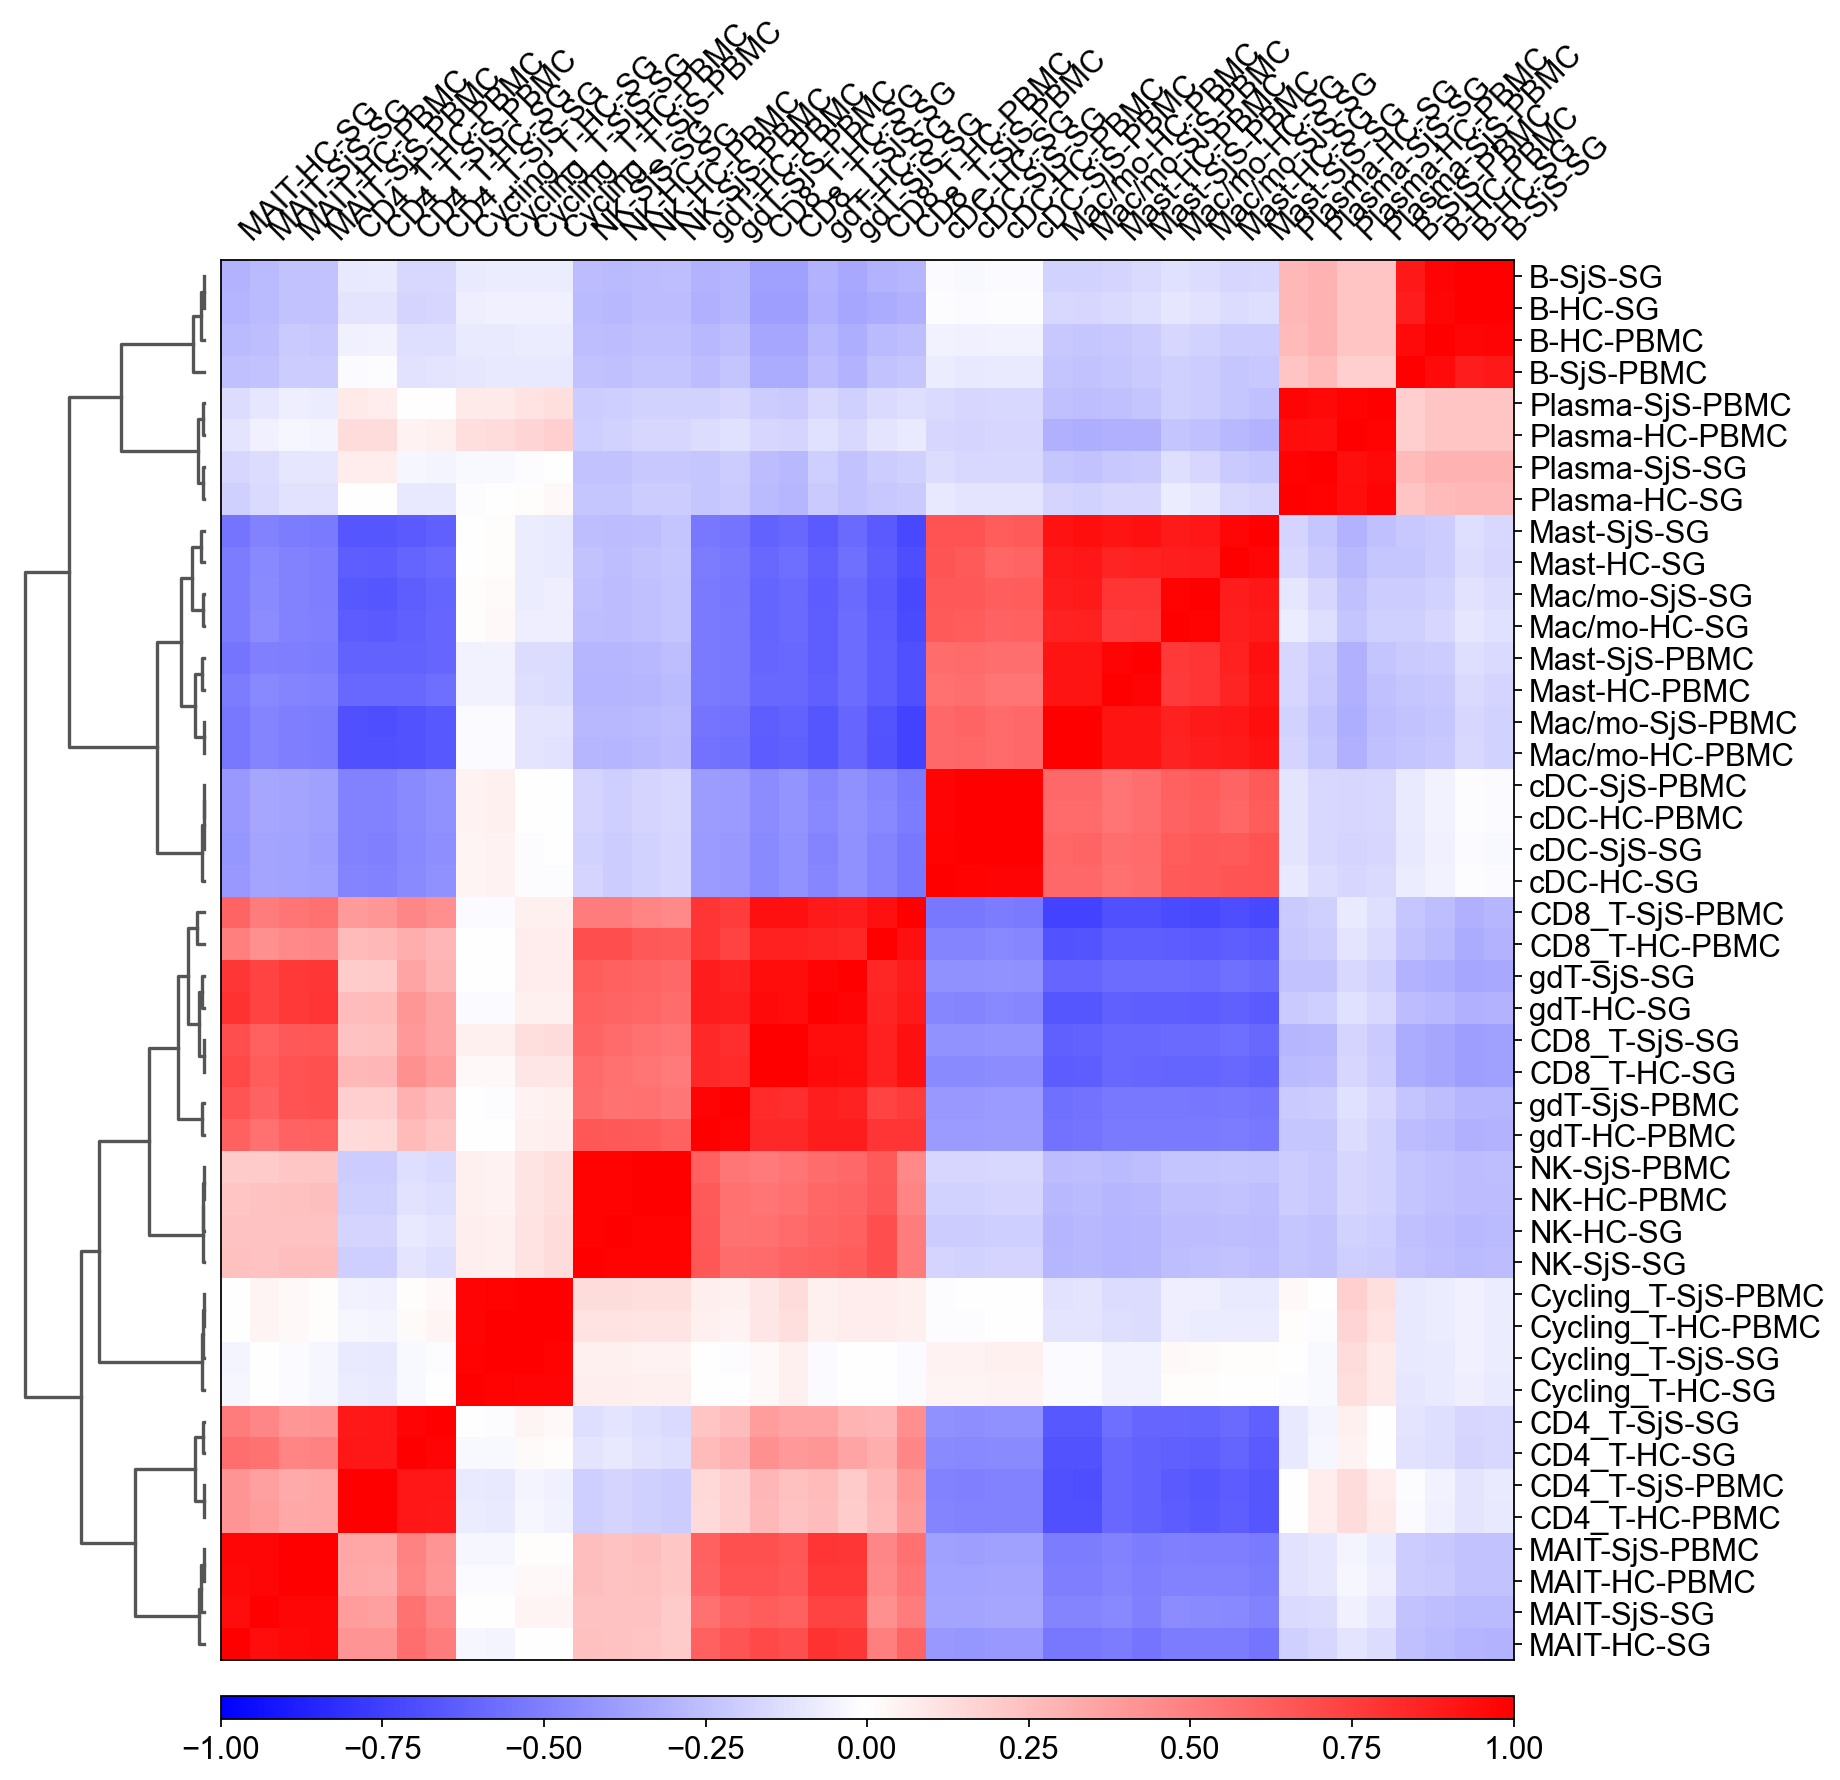

In [35]:
ax = sc.pl.correlation_matrix(adata, 'celltype_state', figsize=(12,12),save='heatmap_AllImmuneCells')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_celltype_minor']`


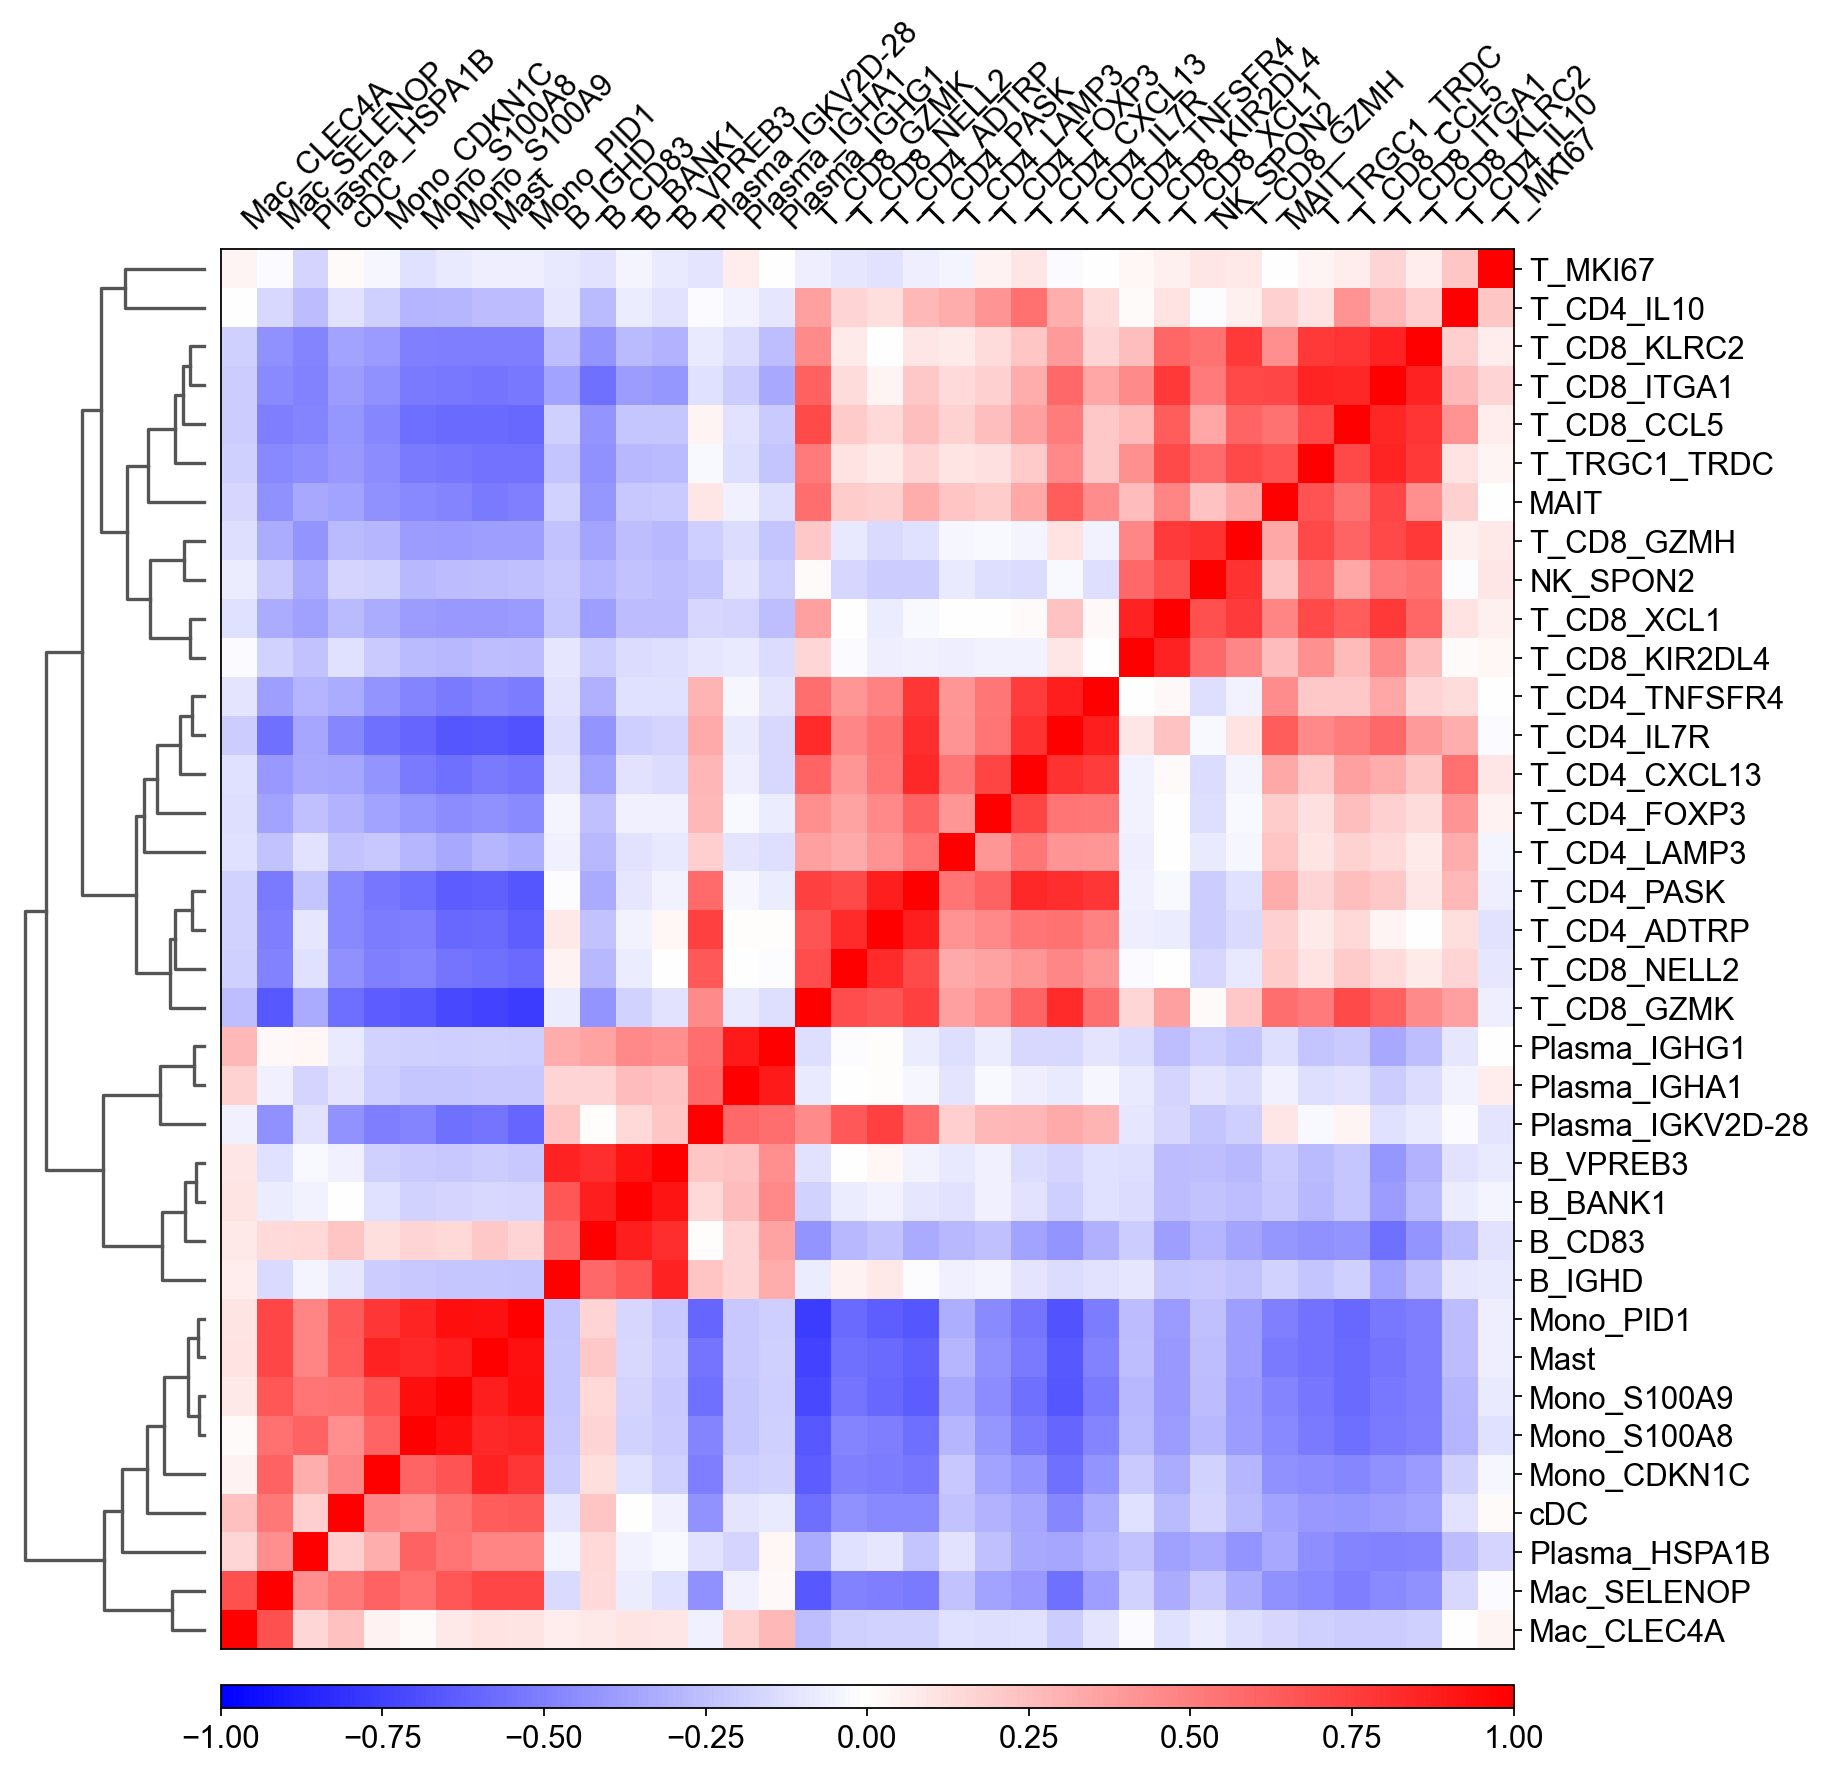

In [34]:
#ax = sc.pl.correlation_matrix(adata, 'celltype_minor', figsize=(12,12),save='heatmap_AllImmuneCells')

## DEGs between SjS and HC across all immune cell-types in PBMC and tissue

### count num of cells of cell-types

In [56]:
meta=adata.obs
num_pbmc=meta[meta['tissue']=='PBMC']['celltype_minor'].value_counts()
num_sg=meta[meta['tissue']=='SG']['celltype_minor'].value_counts()
num_df=pd.DataFrame([num_pbmc,num_sg],index=['PBMC','SG']).T

In [72]:
celltype = num_df[(num_df['PBMC']>100) & (num_df['SG']>100)].index

In [94]:
# Plot bar
order=['B_BANK1','B_CD83','B_IGHD','B_VPREB3','MAIT', 'Mac_CLEC4A', 'Mac_SELENOP','Mast',
 'Mono_CDKN1C','Mono_PID1','Mono_S100A8','Mono_S100A9','NK_SPON2',
 'Plasma_HSPA1B','Plasma_IGHA1','Plasma_IGHG1','Plasma_IGKV2D-28',
 'T_CD4_ADTRP','T_CD4_CXCL13','T_CD4_FOXP3','T_CD4_IL10','T_CD4_IL7R','T_CD4_LAMP3','T_CD4_PASK','T_CD4_TNFSFR4',
 'T_CD8_CCL5',
 'T_CD8_GZMH',
 'T_CD8_GZMK',
 'T_CD8_ITGA1',
 'T_CD8_KIR2DL4',
 'T_CD8_KLRC2',
 'T_CD8_NELL2',
 'T_CD8_XCL1',
 'T_MKI67',
 'T_TRGC1_TRDC',
 'cDC']
celltype=[i for i in order if i in celltype]

### Get num of DEGs of cell-types

In [64]:
# logfc > 0.5 adjust pvalue < 0.01 获得差异基因的筛选条件
DEG_df=pd.read_csv('./data/cx_pbmc_immune_cli_state_df_sep.csv',index_col=0)
#DEG_df=pd.read_csv('./data/cx_pbmc_immune_cli_state_df.csv',index_col=0)
pbmc_df=DEG_df[DEG_df['tissue']=='PBMC']
sg_df=DEG_df[DEG_df['tissue']=='SG']
#
pbmc_DEG=pbmc_df['celltype_minor'].value_counts()
sg_DEG=sg_df['celltype_minor'].value_counts()
num_DEG=pd.DataFrame([pbmc_DEG,sg_DEG],index=['PBMC','SG']).T

In [98]:
## plot
plot_DEG=num_DEG.loc[celltype].fillna(0)

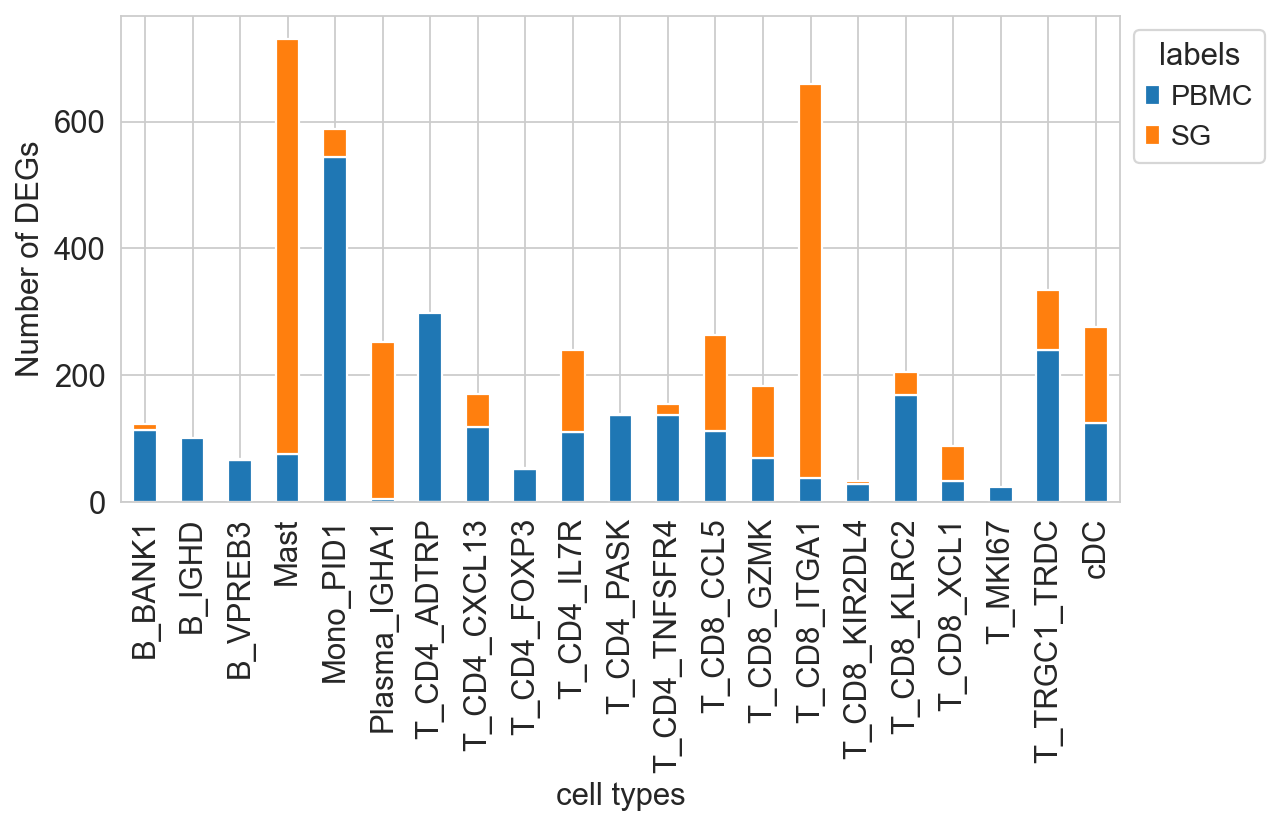

In [103]:
sns.set_style('whitegrid')
plot_DEG.plot(kind='bar', stacked=True,figsize=(8, 4))
# labels for x & y axis
plt.xlabel('cell types')
plt.ylabel('Number of DEGs')
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.savefig('./analysis_result/supplementary/sFig4/DEGs_celltype_stackedPlot.pdf')  # if needed
plt.show()
### 我们关注的这几群细胞类型在局部组织几乎没有差异，但细胞比例发生很大改变，表明血液中的这些细胞类型经过活化迁移到局部中

# Cell-Cell CrossTalk and interactions

In [1]:
1

1